# Hypothesis: 
This hypothesis was issued by the "Statistical Institute Alina Steinmetz" (my wife) and is being preached since we moved from Moscow to Berlin many years ago (in 2011). It is time to examine the truthfulness of this hypothesis:

    "Berlin summers are most of the time much colder than in Moscow. Berlin is much more mild over the year but the summers in Moscow are hotter."
    
# First Try
When searching for data I encountered that there are of course a lot of statistics out there already and decided that it wouldn't make sense for me to work with something that was visualized and depicted 1000 times before. So I just got 3 comparing statistics from the German weather website http://www.wetteronline.de/klima-temperatur/berlin 
, showed them to my wife and explained that when comparing the graphs she will see that...
...
<br /><br /> Berlin is slightly warmer in temperature:

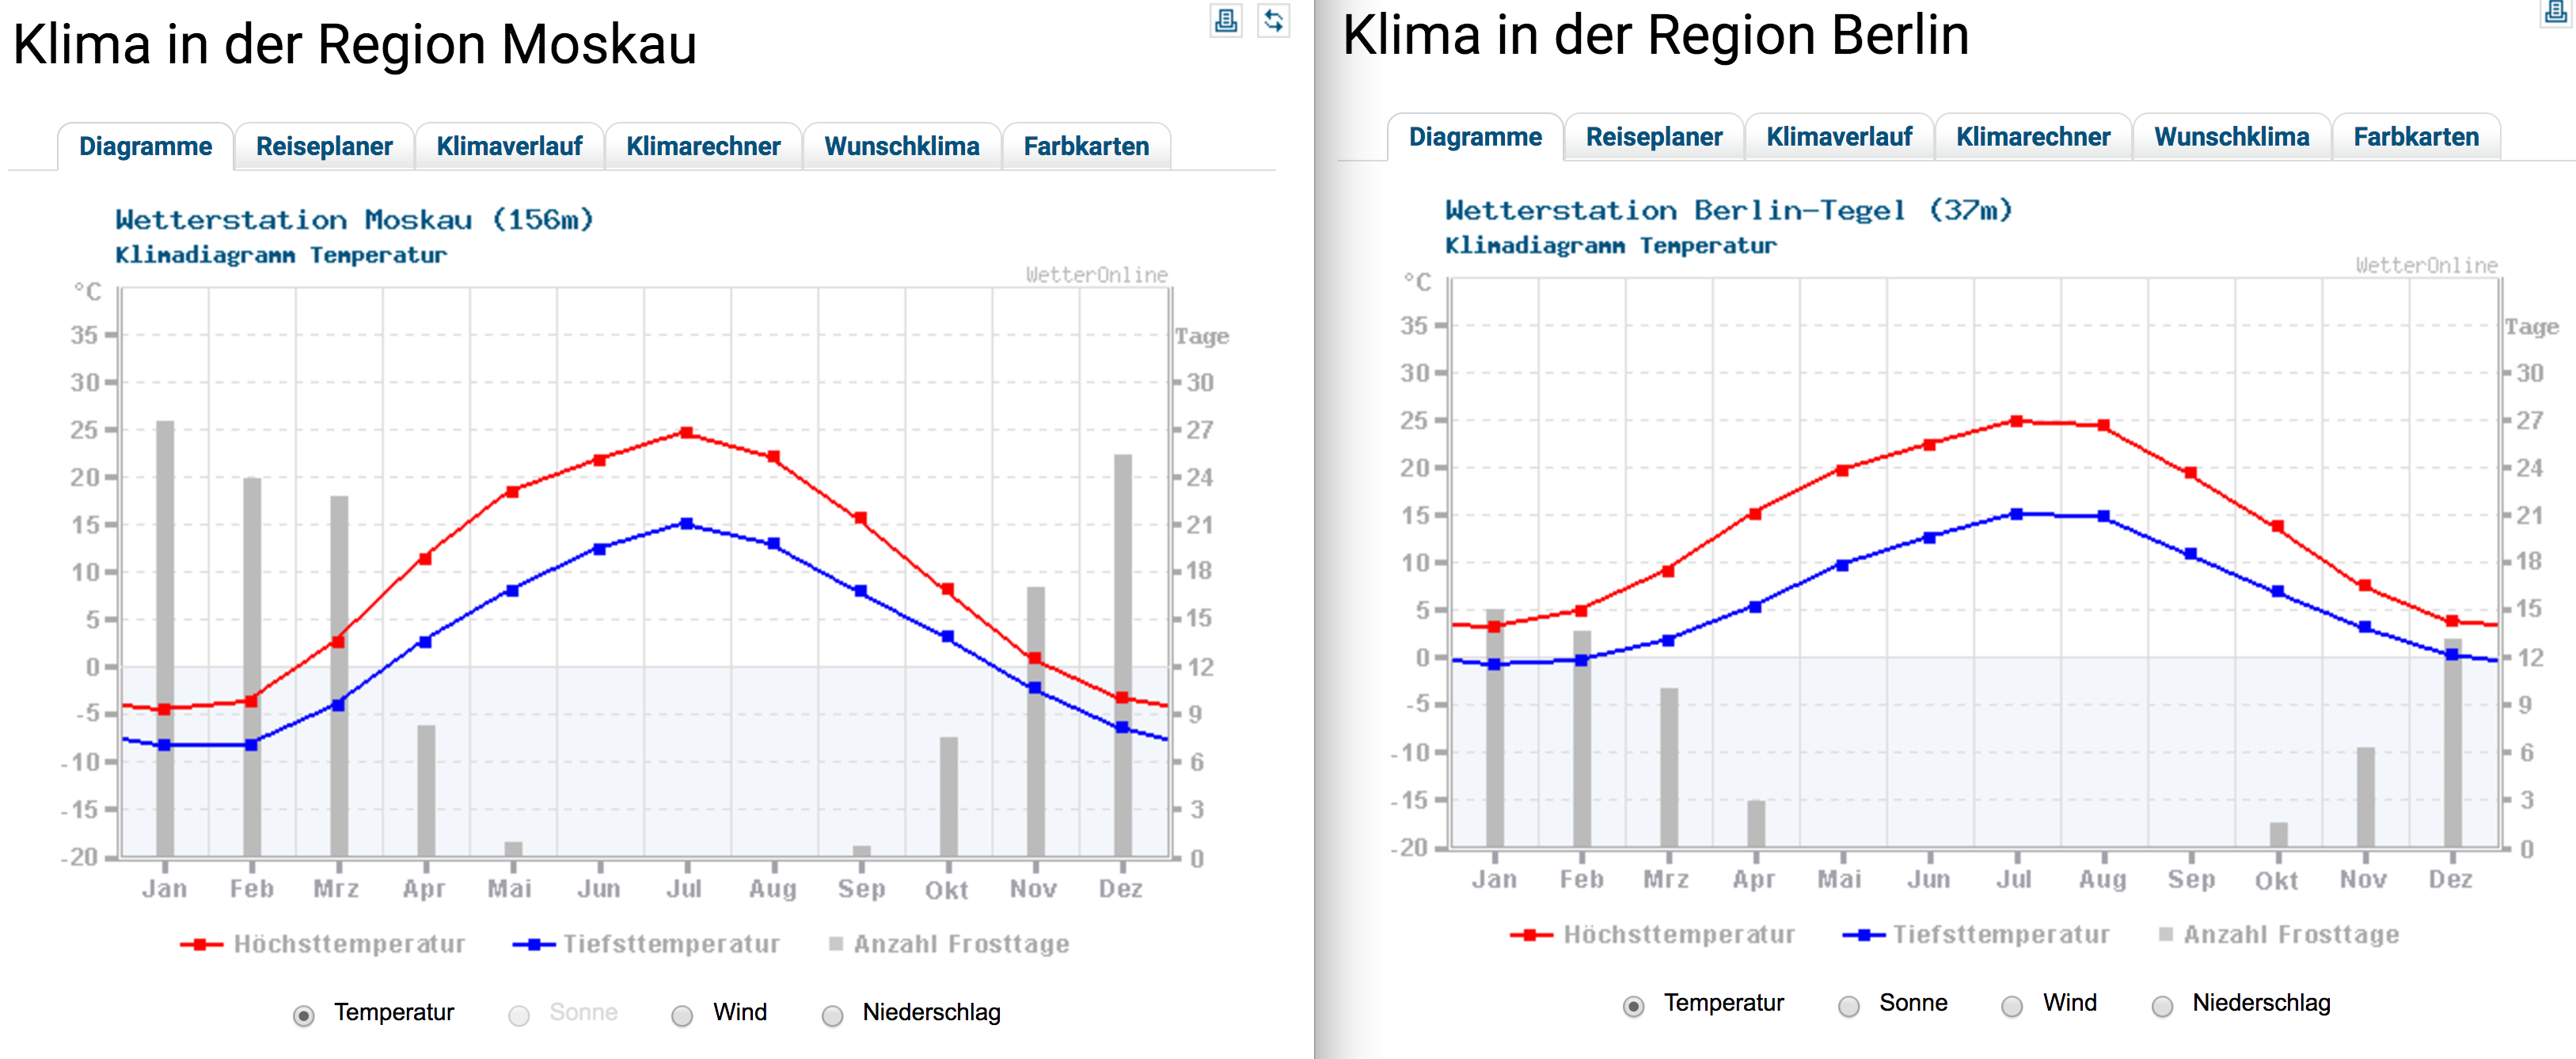

In [11]:
from IPython.display import Image
from IPython.core.display import HTML 
PATH = "/Users/Rich/filebox/data-science/weather/"
Image(filename = PATH + "temperature.png", width=1000)

...
Berlin is less rainy:

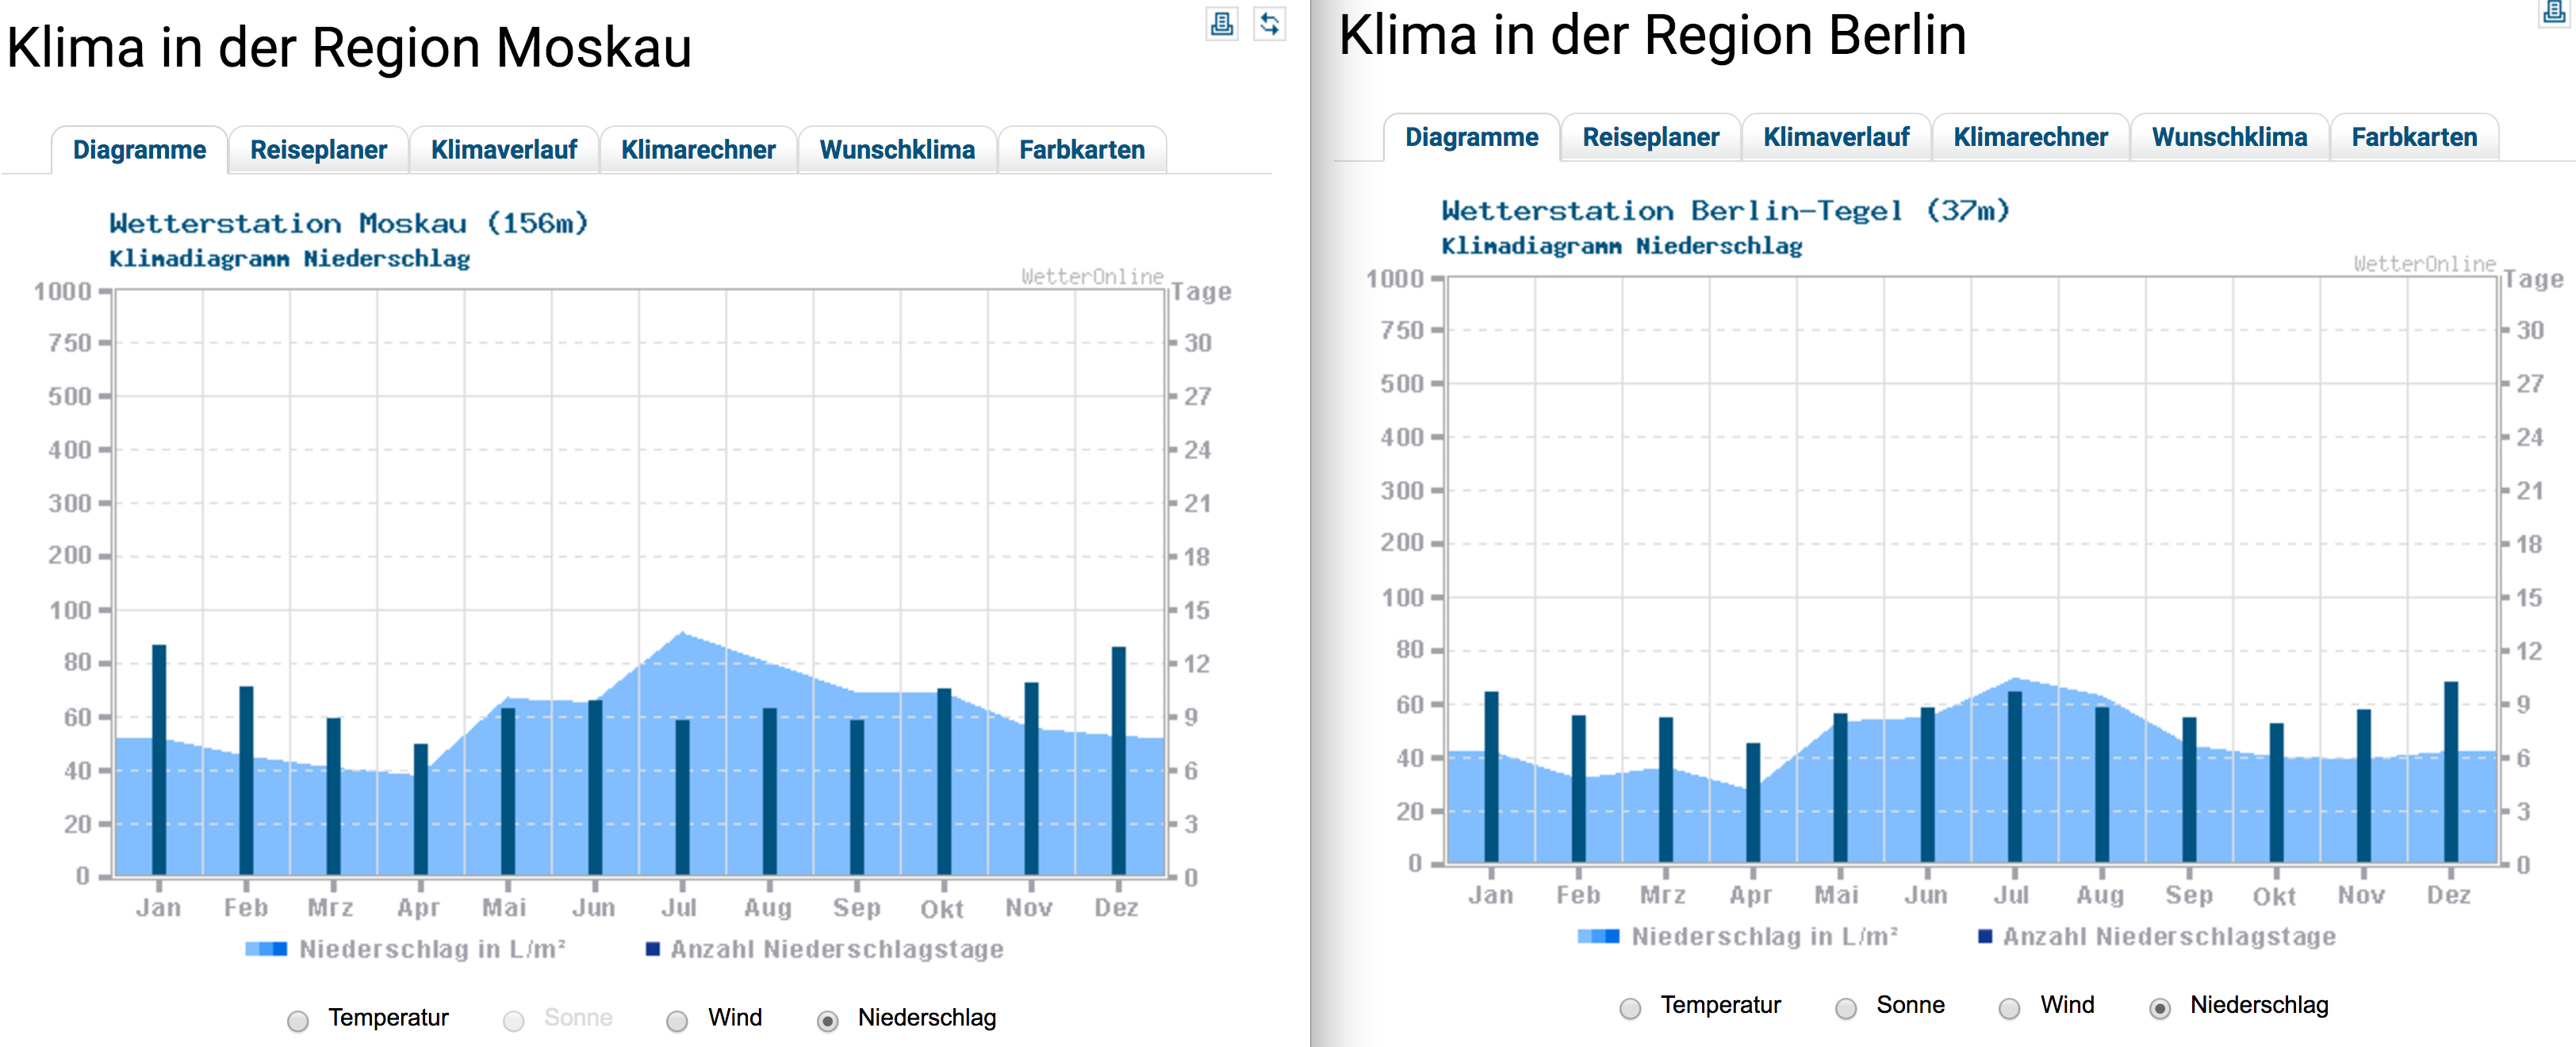

In [12]:
Image(filename = PATH + "rain.png", width=1000)

...
Berlin is more windy:

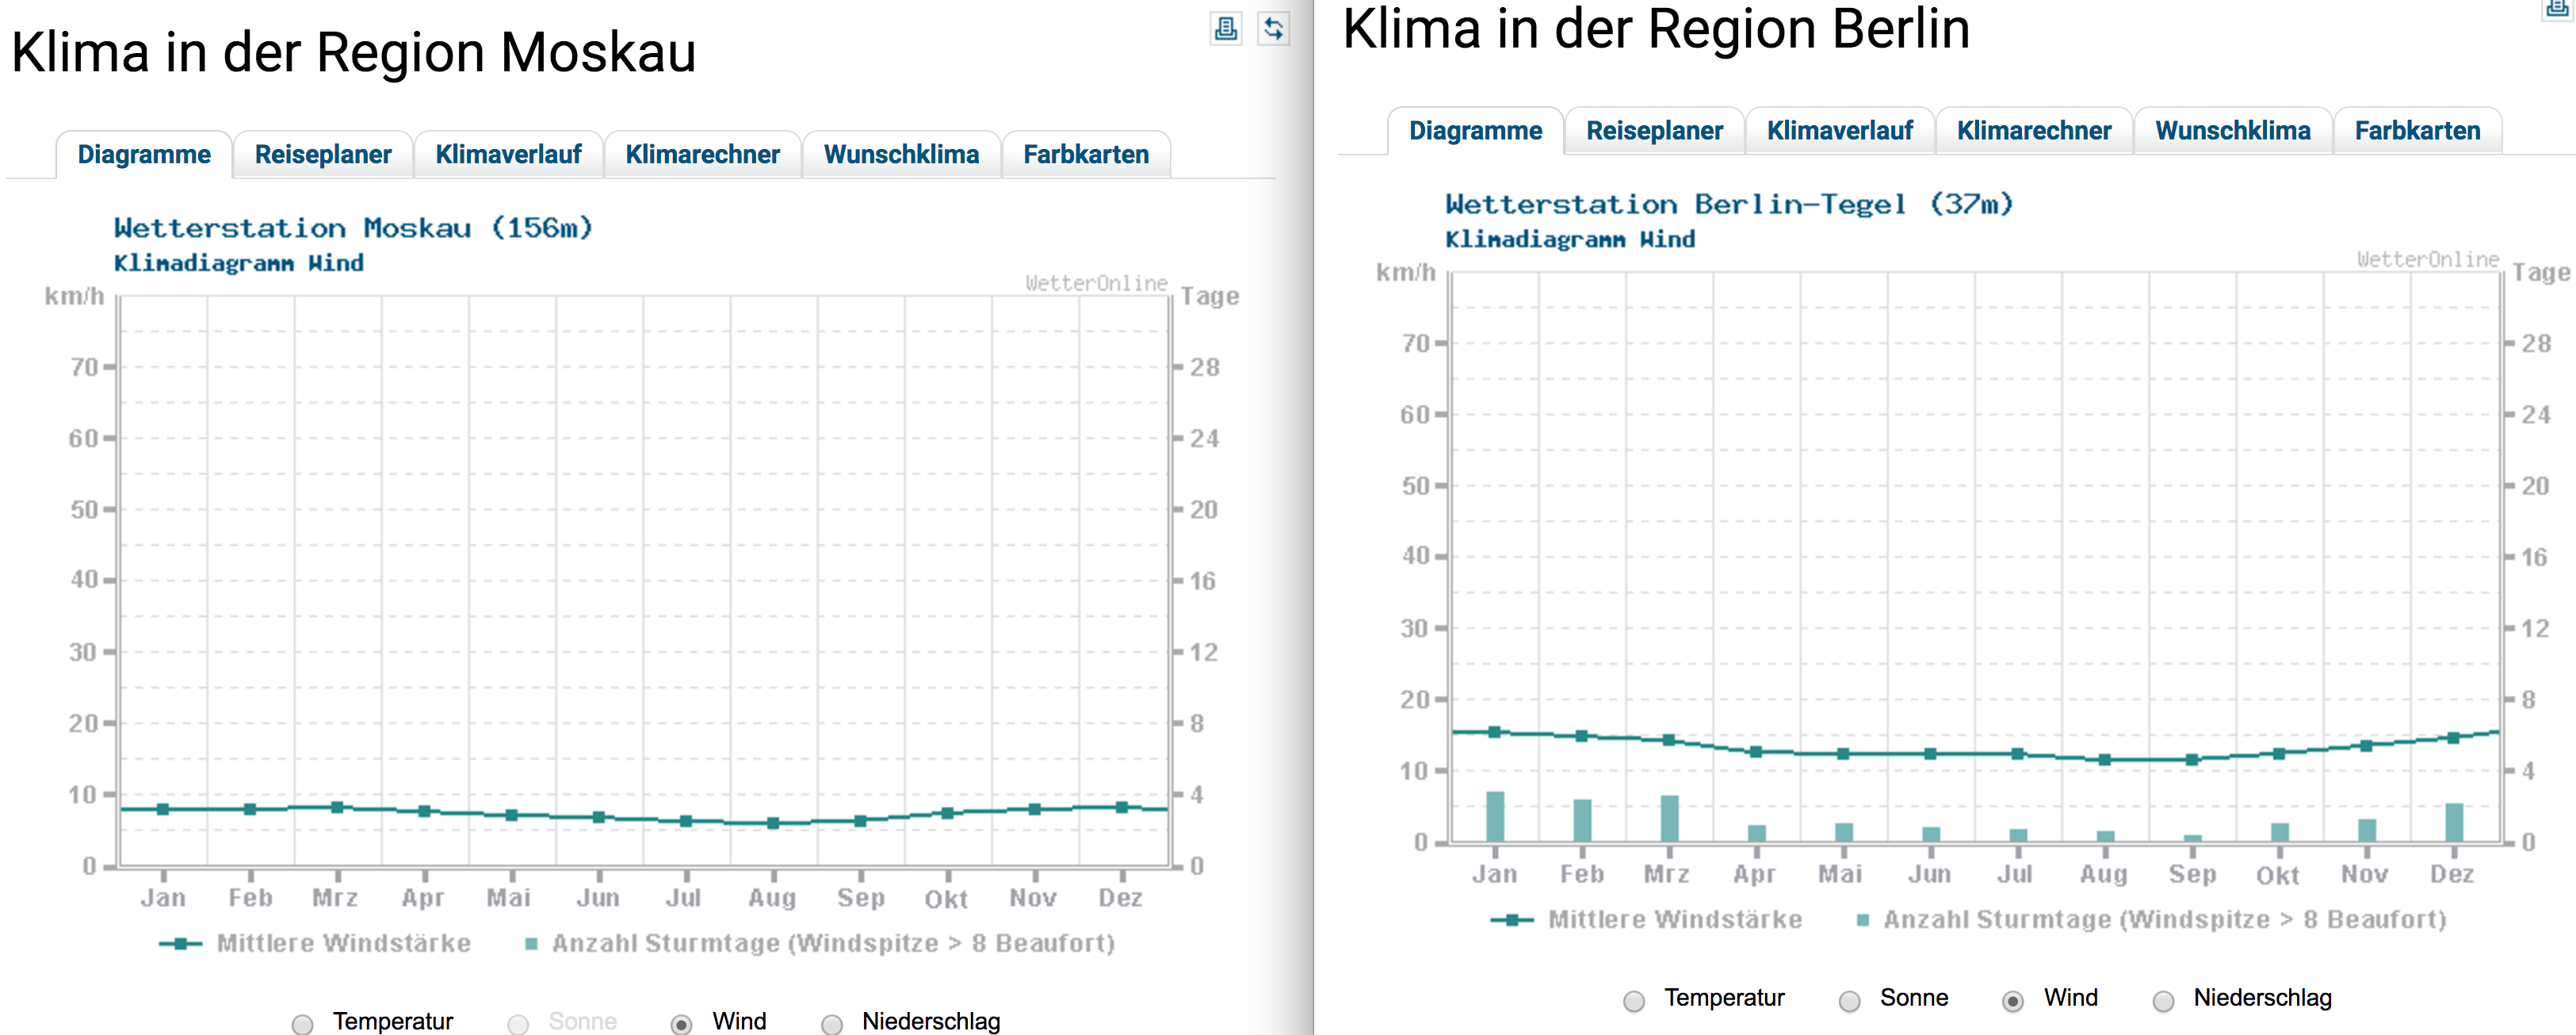

In [13]:
Image(filename = PATH + "wind.png", width=1000)

I was convinced that this little presentation would be enough for every sane person to accept that Moscow's summer is not really a lot more hotter than Berlin's (only less windy).

My wife wasn't really happy, though. She replied that she doesn't know where the statistics come from and what period this is. In fact I realized that I broke one of the basics when starting out with any statistic or data (https://medium.com/data-goodie/data-scientists-exercise-with-their-own-ideas-on-real-datasets-basics-for-starting-out-with-them-c7d4dad98f4b): Expressiveness. I was not sure  which period of time those graphs covered and it's not stated there either. I just said some years... But was it the same amount of time? And who cares about 150 year old data anyway? Also 200 years ago part of Western Europe experienced a minor Ice Age (https://en.wikipedia.org/wiki/Little_Ice_Age), is that taken in the account of Berlin too :D ? So I decided to make my own statistics for some relevant period of time. Firstly, I would take the data from the last 25 years to show the hypothesis' general fallacy. And secondly, examine closely the periods when Mrs. Steinmetz lived in Moscow and when she moved to Berlin to check if there might be some evidence for a little bias.


# Weather data
Getting the weather of Moscow and Berlin wasn't as a funny walk as I thought it would be.
I found the raw datasets to be super cryptic and the explanatory codebooks non-existent or non-sense. When I found some really good looking data on www.wetteronline.de I was very happy as it seemed to be a doable task with some funny scraping tricks using python. The data is nicely organzed in tables and the URLs give readable information:

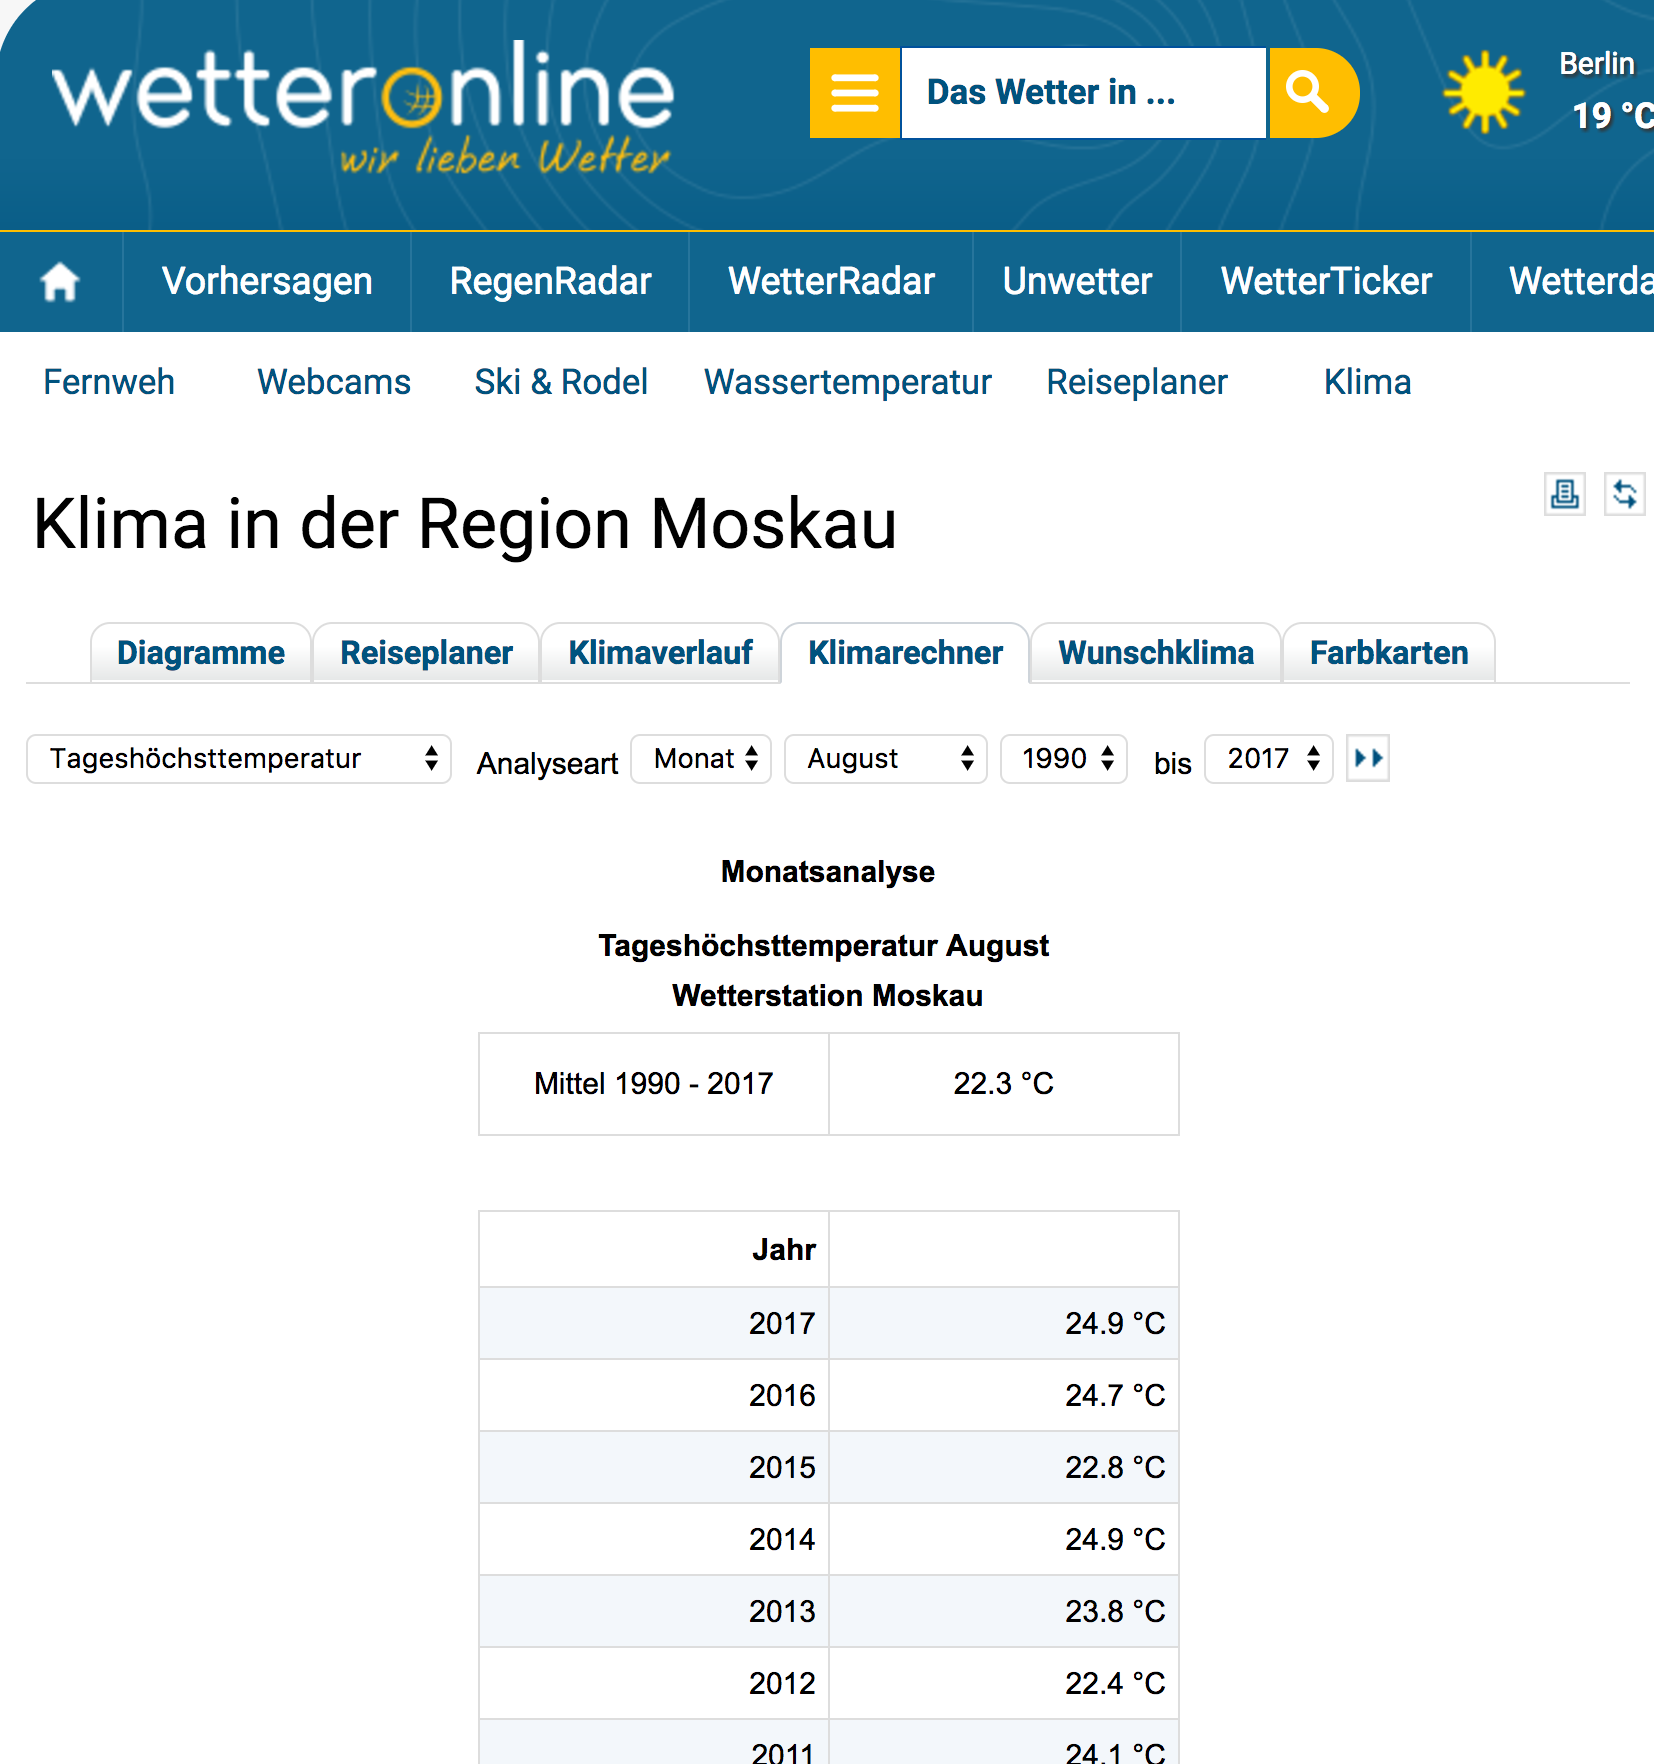

In [15]:
Image(filename = PATH + "example-data-table.png", width=1000)

ATTENTION:
This guide is really step by step, how I approached the problem from Zero to Goal. I think it's good for scraping beginners.

# Getting the Data - Scrape or die 
Scrape is a really cruel word. Actually the process of web scraping having programming experience isn't that cruel. Without it so much, you would have to invest more time, depending on your google-skills and google-luck ;)

I outlined the following plan for my pursue:

Epic: Get all weather data of the www.wetteronline.de page for Moscow and Berlin. (7 categories [like highest average temperature etc.] for every month from 01.1990 to 07.2017)

# I. 
(experimental stage: getting comfortable with data website and tools)

Task 1: Print out Moscow's average highest temperature for August for all years between 1990 and 2017 with the data gathered from the website.

In [3]:
# Libs and main structure of my scrape adventure
# I knew Thanks to Professor Zhang
import pprint
from urllib import request, parse
from bs4 import BeautifulSoup as bs
import os
import sqlite3

In [4]:
# declare variables and load page
'''
base_url = 'http://www.wetteronline.de/'
raw = parse.urljoin(base_url, '?pcid=pc_rueckblick_climate&gid=27612&iid=27612&pid=p_rueckblick_climatecalculator&sid=Default&var=TX&analysis=monthly&month=08&startyear=1990&endyear=2017&iid=27612')
data_page = request.urlopen(raw)
data_html = bs(data_page.read(), 'lxml')

threw: HTTPError: HTTP Error 403: Forbidden :(
search for scraping HTTPError: HTTP Error 403: Forbidden :(
gave: https://stackoverflow.com/questions/16627227/http-error-403-in-python-3-web-scraping
'''

from urllib.request import Request, urlopen

req = Request('http://www.wetteronline.de/?pcid=pc_rueckblick_climate&gid=27612&iid=27612&pid=p_rueckblick_climatecalculator&sid=Default&var=TX&analysis=monthly&month=08&startyear=1990&endyear=2017&iid=27612', headers={'User-Agent': 'Mozilla/5.0'})
webpage = urlopen(req).read()

In [5]:
# Beautiful Output

In [6]:
webpage

b'<!DOCTYPE html>\n<html>\n<head>\n \n <title>Klima in der Region Moskau - Klimarechner - WetterOnline</title>\n <meta http-equiv="X-UA-Compatible" content="IE=edge" />\n <meta name="description" content="Wie war das Klima in der Region Moskau? Mit dem Klimarechner k&ouml;nnen Sie historische Werte ermitteln." />\n <meta http-equiv="content-type" content="text/html; charset=utf-8" />\n <meta http-equiv="content-language" content="de-DE" />\n \n  <meta property="fb:admins" content="100001020190994" />\n <meta property="fb:admins" content="1060016694" />\n\n <meta property="og:title" content="Klima in der Region Moskau - Klimarechner - WetterOnline">\n <meta property="og:type" content="article">\n  <meta name="viewport" content="width=1160">\n <meta property="og:image" content="https://st.wetteronline.de/dr/1.0.799/images/logo/ogimage_wetteronline_1200x630.png">\n \n <meta name="skype_toolbar" content="skype_toolbar_parser_compatible" />\n<meta name="msapplication-TileColor" content="#ff

### Make a soup out of it
No the last output wasn't that nice. The beautifulsoup lib is very popular to convert ugly things in nice readable structures. However I got the gentle message, that html = bs(webpage.read(), 'lxml') doesn't work with 'bytes objects'. Bytes? Yeah...

Just this: ?

In [7]:
webpage = webpage.decode('utf-8')

In [8]:
# webpage_beautyful = bs(webpage.read(), 'lxml') 
# what is bytes object 'webpage'?
soup = bs(webpage, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <title>
   Klima in der Region Moskau - Klimarechner - WetterOnline
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="Wie war das Klima in der Region Moskau? Mit dem Klimarechner können Sie historische Werte ermitteln." name="description"/>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <meta content="de-DE" http-equiv="content-language"/>
  <meta content="100001020190994" property="fb:admins"/>
  <meta content="1060016694" property="fb:admins"/>
  <meta content="Klima in der Region Moskau - Klimarechner - WetterOnline" property="og:title">
   <meta content="article" property="og:type">
    <meta content="width=1160" name="viewport">
     <meta content="https://st.wetteronline.de/dr/1.0.799/images/logo/ogimage_wetteronline_1200x630.png" property="og:image">
      <meta content="skype_toolbar_parser_compatible" name="skype_toolbar"/>
      <meta content="#ffffff" name="msapplication-TileColor"/

In [9]:
# Explore the HTML in Chrome Debugger
# --> 
climate_frame = soup.find(id='climatecalculator_result')
print(climate_frame.prettify())

<table id="climatecalculator_result">
 <thead>
  <tr class="headline">
   <th colspan="2">
    Monatsanalyse
   </th>
  </tr>
  <tr class="headline">
   <th colspan="2">
    Tageshöchsttemperatur August
    <br/>
    Wetterstation Moskau
   </th>
  </tr>
  <tr class="mean">
   <th>
    Mittel 1990 - 2017
   </th>
   <th>
    22.3 °C
   </th>
  </tr>
  <tr class="divide">
   <th colspan="2">
   </th>
  </tr>
  <tr class="detailhead">
   <th>
    Jahr
   </th>
   <th>
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td>
    2017
   </td>
   <td>
    24.8 °C
   </td>
  </tr>
  <tr class="odd">
   <td>
    2016
   </td>
   <td>
    24.7 °C
   </td>
  </tr>
  <tr>
   <td>
    2015
   </td>
   <td>
    22.8 °C
   </td>
  </tr>
  <tr class="odd">
   <td>
    2014
   </td>
   <td>
    24.9 °C
   </td>
  </tr>
  <tr>
   <td>
    2013
   </td>
   <td>
    23.8 °C
   </td>
  </tr>
  <tr class="odd">
   <td>
    2012
   </td>
   <td>
    22.4 °C
   </td>
  </tr>
  <tr>
   <td>
    2011
   </td>
   <

In [14]:
# go deeper
# print(climate_frame.tbody.prettify())

<tbody>
 <tr>
  <td>
   2017
  </td>
  <td>
   24.8 °C
  </td>
 </tr>
 <tr class="odd">
  <td>
   2016
  </td>
  <td>
   24.7 °C
  </td>
 </tr>
 <tr>
  <td>
   2015
  </td>
  <td>
   22.8 °C
  </td>
 </tr>
 <tr class="odd">
  <td>
   2014
  </td>
  <td>
   24.9 °C
  </td>
 </tr>
 <tr>
  <td>
   2013
  </td>
  <td>
   23.8 °C
  </td>
 </tr>
 <tr class="odd">
  <td>
   2012
  </td>
  <td>
   22.4 °C
  </td>
 </tr>
 <tr>
  <td>
   2011
  </td>
  <td>
   24.1 °C
  </td>
 </tr>
 <tr class="odd">
  <td>
   2010
  </td>
  <td>
   27.3 °C
  </td>
 </tr>
 <tr>
  <td>
   2009
  </td>
  <td>
   20.2 °C
  </td>
 </tr>
 <tr class="odd">
  <td>
   2008
  </td>
  <td>
   21.7 °C
  </td>
 </tr>
 <tr>
  <td>
   2007
  </td>
  <td>
   25.7 °C
  </td>
 </tr>
 <tr class="odd">
  <td>
   2006
  </td>
  <td>
   21.7 °C
  </td>
 </tr>
 <tr>
  <td>
   2005
  </td>
  <td>
   23.1 °C
  </td>
 </tr>
 <tr class="odd">
  <td>
   2004
  </td>
  <td>
   23.6 °C
  </td>
 </tr>
 <tr>
  <td>
   2003
  </td>
  <td>
   2

In [11]:
# Now we have a structure, that we hopefully can work with.
# For now it looks like the algorithm should be:
# In your own database:
# For every <tr> put the first <td> in column 'year'
# and the second <td> in column 'highest_temp'
# But how to achieve that in code?

In [17]:
table = climate_frame.tbody
for row in table.findAll('tr'):
    for td in row.find_all("td"):
        print(td.get_text())

2017
24.8 °C
2016
24.7 °C
2015
22.8 °C
2014
24.9 °C
2013
23.8 °C
2012
22.4 °C
2011
24.1 °C
2010
27.3 °C
2009
20.2 °C
2008
21.7 °C
2007
25.7 °C
2006
21.7 °C
2005
23.1 °C
2004
23.6 °C
2003
21.2 °C
2002
22.7 °C
2001
21.6 °C
2000
21.3 °C
1999
21.2 °C
1998
19.3 °C
1997
22.1 °C
1996
- °C
1995
21.1 °C
1994
19.6 °C
1993
19.2 °C
1992
22.4 °C
1991
19.9 °C
1990
19.8 °C


Looks good to me. It should be really easy now to put it all in separate columns in a database.

In [ ]:
# a little side note: when I read myself into web
# scraping (here: https://www.dataquest.io/blog/web-scraping-tutorial-python/), I stumbled over the fact that actually I could
# just use the API without scraping anything, but 'luckily'
# www.wetteronline.de don't have an API for historical :)
# Funny enough, the dataquest tutorial also uses a weather 
# page for scraping. Another important point here: dataquest
# uses CURRENT weather data to scrape. This could be problematic
# with www.wetteronline.de's current data because they sell
# their current weather data API, so this could be subject
# to copyright. Keep in mind to stay in conformity with the
# and inform yourself. (a little intro: http://blog.icreon.us/advise/web-scraping-legality)
# But be aware before STÜRZEN into scraping!

But first we want *all data* for *all months* for *all categories*.
To do so, we first need to examine the URL more closely:
http://www.wetteronline.de/?pcid=pc_rueckblick_climate&gid=27612&iid=27612&pid=p_rueckblick_climatecalculator&sid=Default&var=TX&analysis=monthly&month=08&startyear=1990&endyear=2017&iid=27612

You could divide the URL in a more comprehensive format:
Base URL
http://www.wetteronline.de/ <br />
?<br />
pcid=pc_rueckblick_climate<br />
&<br />
gid=27612<br />
&<br />
iid=27612<br />
&<br />
pid=p_rueckblick_climatecalculator
&
sid=Default
&
var=TX
&
analysis=monthly
&
month=08
&
startyear=1990
&
endyear=2017
&
iid=27612

In [ ]:
# playing around with the form, we can quickly figure out 
# that to get ALL data we have to change var=TX for the
# catogries and month=08
# before I apply my theories to a real database, I like to 
# verify them with some plain print outs. First I will create
# the arrays with the variable url parts

In [20]:
months = ['01','02','03','04','05','06','07','08','09','10','11','12']
categories = ['TX','TN','NS','FFkmh']
category = 'TN'
month = '01'
req = Request('http://www.wetteronline.de/?pcid=pc_rueckblick_climate&gid=10382&iid=10382&pid=p_rueckblick_climatecalculator&sid=Default&var=' + category + '&analysis=monthly&month=' + month + '&startyear=1990&endyear=2017&iid=10382', headers={'User-Agent': 'Mozilla/5.0'})
webpage = urlopen(req).read()

webpage = webpage.decode('utf-8')

soup = bs(webpage, 'html.parser')

climate_frame = soup.find(id='climatecalculator_result')

table = climate_frame.tbody
for row in table.findAll('tr'):
    for td in row.find_all("td"):
        print(td.get_text())

2017
-2.9 °C
2016
-2.0 °C
2015
1.6 °C
2014
-0.9 °C
2013
-1.4 °C
2012
0.2 °C
2011
-0.1 °C
2010
-6.3 °C
2009
-3.9 °C
2008
1.8 °C
2007
3.5 °C
2006
-5.2 °C
2005
1.5 °C
2004
-2.8 °C
2003
-2.4 °C
2002
0.0 °C
2001
-0.7 °C
2000
-0.5 °C
1999
1.4 °C
1998
1.4 °C
1997
-4.3 °C
1996
-5.5 °C
1995
-0.8 °C
1994
2.1 °C
1993
0.4 °C
1992
-0.1 °C
1991
0.5 °C
1990
2.4 °C


# Conclusion
Thanks for staying by. By now we have achieved scraping all average data of all categories for all months and all historical years down to 1990.

# What's next?
Next I will continue with setting up a database, push the data into it and start to analyze 

Please let me know how you found this step by step format and of course any other feedback is welcome. 

... footer ...